<a href="https://colab.research.google.com/github/infiniteoverflow/CIFAR10-Classification/blob/master/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Dataset

We will be working with the CIFAR10 Dataset to perform image classification using CNN. The images in the database are small color images that fall into one of 10 classes.  
<br>


<p align="center">
  <img width="460" height="400" src="https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png">
</p>


## Check for GPU

In [2]:
import numpy as np
import torch

train_on_gpu = torch.cuda.is_available()

if train_on_gpu:
  print("GPU is available")
else:
  print("GPU is not available")

GPU is available


## Loading the dataset

In [0]:
from torchvision import datasets,transforms
from torch import nn
from torch.utils.data.sampler import SubsetRandomSampler

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                                ])

trainset = datasets.CIFAR10('/tmp/cifar-train',train=True,transform=transform,download=True)
testset = datasets.CIFAR10('/tmp/cifar-test',train=False,transform=transform,download=True)

Extracting /tmp/cifar-train/cifar-10-python.tar.gz to /tmp/cifar-train


Extracting /tmp/cifar-test/cifar-10-python.tar.gz to /tmp/cifar-test


In [0]:
num_workers = 0

batch_size = 20

valid_size = 0.2

num_train = len(trainset)
indices = list(range(num_train))
np.random.shuffle(indices)

split = int(np.floor(valid_size*num_train))

train_idx,valid_idx = indices[split:] , indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(valid_idx)

In [0]:
train_loader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,sampler=train_sampler)

validation_loader = torch.utils.data.DataLoader(trainset,batch_size,sampler=validation_sampler)

test_loader = torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle = True)

In [12]:
dataiter = iter(train_loader)
images , labels = next(dataiter)

images.shape

torch.Size([20, 3, 32, 32])

**So the image size is 32x32 with 3 channels**

In [13]:
dataiter = iter(validation_loader)
images , labels = next(dataiter)

images.shape

torch.Size([20, 3, 32, 32])

In [14]:
dataiter = iter(test_loader)
images , labels = next(dataiter)

images.shape

torch.Size([20, 3, 32, 32])

## Visualize a batch of images

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

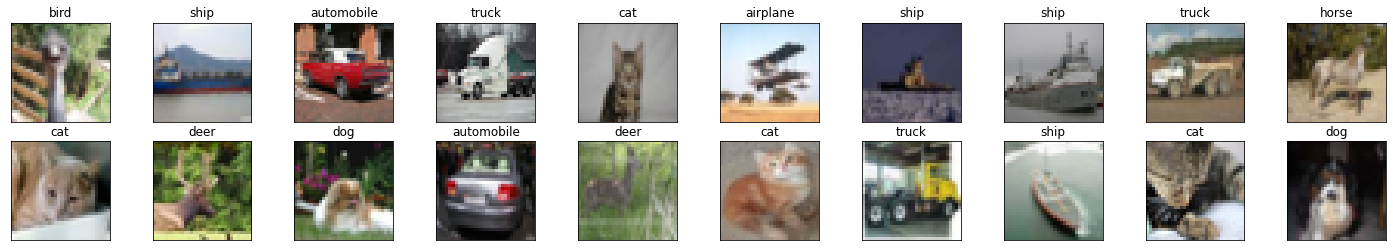

In [17]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])